# Basic vector operations

## How to make a column vector
- If you want to make a vector with a Numpy array, it will be a row vector.
- Row vectors are fine for programming, but column vectors are more convenient for studying linear algebra concepts.
  - You will understand why this is convenient when you learn about matrices and linear transformations.
- Therefore, we need to use reshape(1,-1) to make it a column vector
  - reshape(row,column) changes the shape of the Numpy array with row and column values
    -1 means that the length is automatically determined by guessing from the specified values of the other dimensions.
- The following is some example of creation for row vectors
${\pmb x}=\left(
    \begin{array}{c}
      2 \\
      1 \\
    \end{array}
  \right)$
と
${\pmb y}=\left(
    \begin{array}{c}
      1 \\
      3 \\
    \end{array}
  \right)$


In [1]:
import numpy as np

x=np.array([2,1])
x

array([2, 1])

In [2]:
x=x.reshape(-1,1)
x

array([[2],
       [1]])

In [3]:
y=np.array([1,3]).reshape(-1,1)
y

array([[1],
       [3]])

## ベクトルの和とスカラーとの積
- ${\pmb x}=\left(
    \begin{array}{c}
      2 \\
      1 \\
    \end{array}
  \right)$,
${\pmb y}=\left(
    \begin{array}{c}
      1 \\
      3 \\
    \end{array}
  \right)$
  - ${\pmb x}+{\pmb y}$
  - ${\pmb x}-{\pmb y}$
  - $2{\pmb x}$
    - "2*x"と記述することを注意
  - $-{\pmb y}$
  - $2{\pmb x}-{\pmb y}$

In [4]:
x=np.array([2,1]).reshape(-1,1)
y=np.array([1,3]).reshape(-1,1)

In [5]:
x+y

array([[3],
       [4]])

In [6]:
x-y

array([[ 1],
       [-2]])

In [7]:
2*x

array([[4],
       [2]])

In [8]:
-y

array([[-1],
       [-3]])

In [9]:
2*x-y

array([[ 3],
       [-1]])

## Note that the product of arrays in Numpy is completely different from the inner and outer products of vectors.
- Note that "x\*y" produces a vector whose components are products of elements, which is completely different from the inner and outer products of vectors.
  - In Python, the calculation of "x\*y" is called the **Hadamar product**, and the Hadamar product of a vector $\pmb{x, y}$ is written as $\pmb{x}\otimes\pmb{y}$.

In [10]:
x*y

array([[2],
       [3]])

- By the way, the inner product of vectors is a scalar.

In [12]:
np.dot(x.T,y)[0]

array([5])

- Incidentally, the outer product between vectors is defined between 3-dimensional vectors

In [13]:
u = np.array([2, 1, 0])
v = np.array([3, 4, 2])
np.cross(u,v)

array([ 2, -4,  5])

#Norm

## Vector magnitude (actually the L2 norm)

In [14]:
x=np.array([4,-3]).reshape(-1,1)
x

array([[ 4],
       [-3]])

In [15]:
np.linalg.norm(x)

5.0

## L1 norm

In [16]:
np.linalg.norm(x,1)

7.0

## L2 norm

In [17]:
np.linalg.norm(x,2)

5.0

## L∞norm

In [18]:
np.linalg.norm(x,np.inf)

4.0

# Distance

## Euclidean distance

In [19]:
x=np.array([4,-3]).reshape(-1,1)
y=np.array([2,4]).reshape(-1,1)

In [20]:
np.linalg.norm(x-y)

7.280109889280518

In [21]:
from scipy.spatial import distance
distance.euclidean(x.reshape(1,-1)[0],y.reshape(1,-1)[0])

7.280109889280518

## Manhattan Distance

In [22]:
from scipy.spatial import distance
distance.cityblock(x.reshape(1,-1)[0],y.reshape(1,-1)[0])

9

## Euclidean distance

In [23]:
from scipy.spatial import distance
distance.euclidean(x.reshape(1,-1)[0],y.reshape(1,-1)[0])

7.280109889280518

## Chebyshev Distance

In [24]:
from scipy.spatial import distance
distance.chebyshev(x.reshape(1,-1)[0],y.reshape(1,-1)[0])

7

# Is orange closer to red, yellow or blue? (Distance section)
- Let's try to find which color orange is closer to red or blue by Euclidean distance.

## RGB, a method of color representation
- A method of color representation that mixes the three primary colors red (Red), green (Green), and blue (Blue) to reproduce a wide range of colors.
  - https://ja.wikipedia.org/wiki/RGB
- The brightness of each color ranges from 0 to 255.

- Each color is represented as follows
  - Orange is RGB(255, 165, 0)
  - Red is RGB(255, 0, 0)
  - Yellow is RGB(255, 255, 0)
  - Blue is RGB(0, 0, 255)

## Calculate with Euclidean distance
- Using the RGB value of each color as a vector, calculate by Euclidean distance, the smaller the value, the closer.

In [25]:
import numpy as np
from scipy.spatial import distance

# Orange vector
orange=np.array([255, 165, 0]).reshape(-1,1)

# Red vector
red=np.array([255, 0, 0]).reshape(-1,1)

# Yellow vector
yellow=np.array([255, 255, 0]).reshape(-1,1)

# Blue vector
blue=np.array([0, 0, 255]).reshape(-1,1)


In [26]:
# Orange to orange (they are the same, so the distance should be zero)
np.linalg.norm(orange-orange)

0.0

In [27]:
# Orange and red
np.linalg.norm(orange-red)

165.0

In [ ]:
# Orange and yellow
np.linalg.norm(orange-yellow)

90.0

In [ ]:
# Orange and blue
np.linalg.norm(orange-blue)

396.57912199206856

- These results indicate that orange and yellow are the most similar colors, red is next, and blue is the farthest away.



# inner product
- np.dot(x.T,y)
  - .T denotes transposition.
  - The inner product can be thought of strictly as an operation of row and column vectors
    - For this reason, we will leave the details to the matrix product.

In [28]:
x=np.array([4,-3]).reshape(-1,1)
y=np.array([2,4]).reshape(-1,1)

In [29]:
np.dot(x.T,y) # The inner product between vectors is a scalar, but Python returns a Numpy array with only one element

array([[-4]])

In [30]:
np.dot(x.T,y)[0,0]

-4

## Cosine similarity
- Define the function cos_similarity(x, y)


In [31]:
import numpy as np
def cos_similarity(x,y):
    return np.dot(x.T, y)[0][0] / (np.linalg.norm(x) * np.linalg.norm(y))

In [32]:
x=np.array([4,-3]).reshape(-1,1)
y=np.array([2,4]).reshape(-1,1)

In [33]:
cos_similarity(x,y)

-0.17888543819998318

# Is orange closer to red, yellow or blue? (Cosine similarity section)
- Let's try to find which color orange is closer to red or blue by Cosine similarity.

## RGB, a method of color representation
- A method of color representation that mixes the three primary colors red (Red), green (Green), and blue (Blue) to reproduce a wide range of colors.
  - https://ja.wikipedia.org/wiki/RGB
- The brightness of each color ranges from 0 to 255.

- Each color is represented as follows
  - Orange is RGB(255, 165, 0)
  - RGB(255, 0, 0) for red
  - Yellow is RGB(255, 255, 0)
  - RGB(0, 0, 255) for blue

## Calculate by Cosine Similarity
- Using the RGB values of each color as a vector, calculate by Euclidean distance, the larger the value, the closer.

In [34]:
import numpy as np

# Orange vector
orange=np.array([255, 165, 0]).reshape(-1,1)

# Red Vector
red=np.array([255, 0, 0]).reshape(-1,1)

# Yelow Vector
yellow=np.array([255, 255, 0]).reshape(-1,1)

# Blue vector
blue=np.array([0, 0, 255]).reshape(-1,1)


In [35]:
# Orange to orange (should be 1 for similarity since they are the same)
cos_similarity(orange,orange)

1.0

In [36]:
# Orange and red
cos_similarity(orange,red)

0.8395701571521511

In [37]:
# Orange and yellow
cos_similarity(orange,yellow)

0.9778024140774094

In [38]:
# Orange and blue
cos_similarity(orange,blue)

0.0

- These results indicate that orange and yellow are the most similar colors, red is next, and blue is the farthest away.

# [Applied] Simple Perceptron

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd
df0=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/iris.csv')
df0

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [41]:
df = df0[df0['variety']!='Setosa']
df = df.drop(df.columns[[1,2]], axis=1)
df['variety'] = df['variety'].map({'Versicolor':1, 'Virginica':-1})
df=df.reset_index(drop=True)
df

,sepal.length,petal.width,variety
0,7.0,1.4,1
1,6.4,1.5,1
2,6.9,1.5,1
3,5.5,1.3,1
4,6.5,1.5,1
...,...,...,...
95,6.7,2.3,-1
96,6.3,1.9,-1
97,6.5,2.0,-1
98,6.2,2.3,-1


In [42]:
x = df[['sepal.length',	'petal.width']].values
y = df['variety'].values

In [43]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [44]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=40, eta0=0.1)
model.fit(x,y)
W=model.coef_
W

array([[ 1.32, -6.26]])

In [45]:
x1=[5.8,1. ]
x2=[6.7,2.3]

#### np.dot(inner-product formula) and model.predict(note that the result is the same as the calculation in sckit-learn)

In [46]:
import numpy as np

y=np.dot(W,x2)
if y>=0:
  print(1)
else:
  print(-1)

-1


In [47]:
model.predict([x2])

array([-1])

# Assiginment 1
Consider and implement the following three issues in your own way.

1. introduce and implement specific spaces and metrics that can represent your area of interest.

2. implement your original system by applying cosine similarity by using Google Colabratory

3. Almost all current machine learning techniques are keyed to spatial and metric settings. This is currently the third AI boom. After considering the differences from the first and second AI booms, explain why space and metric settings are key.

# Basic matrix Operation

In [48]:
A = np.array([
    [ 4, -7, 4],
    [ 1, 1, -1],
    [ 2, 5, -8],
])
B = np.array([
    [ 1, 2, -5],
    [ 2, 3, -7],
    [ 4, -1, 7],
])
k=10

In [49]:
A+B

array([[ 5, -5, -1],
       [ 3,  4, -8],
       [ 6,  4, -1]])

In [50]:
A-B

array([[  3,  -9,   9],
       [ -1,  -2,   6],
       [ -2,   6, -15]])

In [51]:
k*A

array([[ 40, -70,  40],
       [ 10,  10, -10],
       [ 20,  50, -80]])

In [52]:
(1/k)*A

array([[ 0.4, -0.7,  0.4],
       [ 0.1,  0.1, -0.1],
       [ 0.2,  0.5, -0.8]])

- Product of Matrix and Vector
  - The product of a matrix and a vector uses numpy.dot(A,b) in Python

In [53]:
A = np.array([
    [ 4, -7, 4],
    [ 1, 1, -1],
    [ 2, 5, -8],
])
B = np.array([
    [ 1, 2, -5],
    [ 2, 3, -7],
])
x = np.array([1, 2, 3]).reshape(-1,1)

In [54]:
np.dot(A,x)

array([[  2],
       [  0],
       [-12]])

In [55]:
np.dot(B,x)

array([[-10],
       [-13]])

- Matrix and Matrix Products
  - The product of a matrix and a matrix uses numpy.dot(A,B) in Python

In [56]:
A = np.array([
    [ 2, 1],
    [ 1, 3],
    [ 1, -1],
])
B = np.array([
    [ 1, -1, 2],
    [ 1, 2, 3],
])

In [57]:
np.dot(A,B)

array([[ 3,  0,  7],
       [ 4,  5, 11],
       [ 0, -3, -1]])

In [58]:
np.dot(B,A)

array([[ 3, -4],
       [ 7,  4]])

# Embedding
- To vectorize an object with a fixed number of dimensions so that objects that are close together are near and objects that are far apart are far apart


## Image Embedding
- AugNet
  - Machine learning model that extracts image features and converts images into 768-dimensional vectors
    - M. Chen, Z. Chang, H. Lu, B. Yang, Z. Li, L. Guo, and Z. Wang, "AugNet: End-to-End Unsupervised Visual Representation Learning with Image Augmentation," arXiv preprint arXiv:2106.06250, 2021. [Online]. Available: https://arxiv.org/abs/2106.06250


## Details of images to be used
- img01.jpg, img02.jpg, and img03.jpg are from the following image dataset
  - A. Coates, H. Lee, and A. Y. Ng, "An Analysis of Single Layer Networks in Unsupervised Feature Learning," in Proc. AISTATS, 2011. [Online]. Available: http://cs.stanford.edu/~acoates/stl10

## Mount Google Drive
- Mount Google Drive so that img01.jpg, img02.jpg, and img03.jpg are stored in Google Drive and can be read

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Define a function to display an image


In [60]:
from IPython.display import Image, display
import os

def show_image(path):
    if os.path.exists(path) and path.lower().endswith('.jpg'):
        display(Image(path))
    else:
        print("No JPG file exists in the specified path.")

## img01.jpg, img02.jpg, img03.jpgを表示

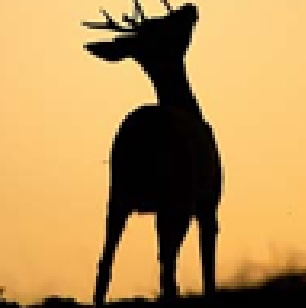

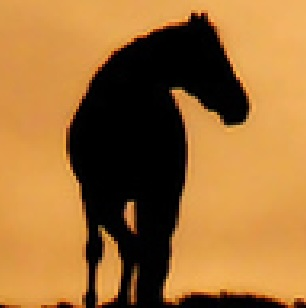

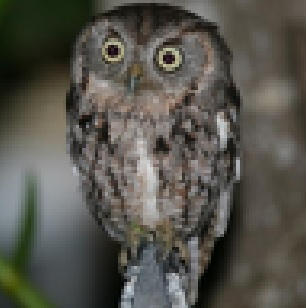

In [61]:
# ここでファイルのパスを指定します
img1 = '/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/img01.jpg'
img2 = '/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/img02.jpg'
img3 = '/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/img03.jpg'
show_image(img1)
show_image(img2)
show_image(img3)

## Install AugNet

In [62]:
%%capture
!pip install imgsim

## Define function to calculate cosine similarity

In [63]:
import numpy as np
def cos_sim(v1,v2):
  return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

## Embedding by AugNet from img01.jpg, img02.jpg, img03.jpg (extract 768 dimensional vectors representing features)

In [64]:
import cv2
import numpy as np
import imgsim
vtr = imgsim.Vectorizer()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [65]:
img1_path = '/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/img01.jpg'
img1 = cv2.imread(img1_path)
vec1 = vtr.vectorize(img1)
print(vec1)
print(vec1.shape)

[-0.6252688  -0.99993473 -0.24260163  0.9451325  -0.99929225 -1.
  0.97356045  0.99975383 -0.99998695 -0.99952126  0.99997824 -0.99999547
  0.9999998  -0.52925503  0.9982279  -0.746932    0.9999938  -0.9970678
 -0.9999998   0.99999523  0.9056393   0.9948861   1.          0.99311256
  0.99975103  0.99370694  0.99961764 -0.99230695 -0.9999554   0.7911224
 -0.99908406 -0.99975955 -0.9999975   0.9997521  -0.9960052  -0.9980342
  0.99955183  1.          0.9997088  -1.         -0.9590664  -0.8148787
  0.9915424   0.7101855   0.39049858  0.9824373   0.99999976  0.99954695
 -0.91318375 -0.88353324  0.9022542  -0.99987566 -0.99997085  0.99988115
 -0.9999914  -0.86306465 -0.9999959  -0.8572827  -0.99766797  0.9593938
 -0.93426156  0.9998534  -0.9999665   0.99423     0.9995549   0.54187024
  0.8332569  -0.9912116  -0.6290261  -0.9989844   1.         -0.9999589
  0.9999978  -0.97148764  0.99793637  0.99711055 -0.9999538  -0.9999998
 -0.93307775  0.99999505 -0.4271444   0.7710296  -0.98775965  0.99

In [66]:
vec1.shape

(768,)

In [67]:
img2_path = '/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/img02.jpg'
img2 = cv2.imread(img2_path)
vec2 = vtr.vectorize(img2)
print(vec2)
print(vec2.shape)

[-0.3835575  -0.99995536 -0.6624805  -0.40938142 -0.9999364  -1.
  0.88836306  0.9992879  -0.9999902  -0.9991806   0.999785   -0.9999997
  0.99999976 -0.5853665   0.99990416 -0.7305834   0.99994946 -0.99773943
 -0.9999985   0.9999345   0.95016676  0.8832668   1.          0.9940965
  0.9999097   0.9997643   0.999807   -0.99745876 -0.9999954   0.9995067
 -0.9951733  -0.9998185  -0.99999297  0.9999958  -0.9910033  -0.9991778
  0.9999373   1.          0.9997885  -1.         -0.9860761  -0.23406498
  0.99459594  0.21121453 -0.93865377  0.99990404  0.99999934  0.99697506
 -0.45679232 -0.9507058   0.9962967  -0.99987847 -0.9999983   0.9998842
 -0.9999878   0.8289691  -0.9999963  -0.8374672  -0.92470443  0.96598566
  0.38721672  0.99988586 -0.9996049   0.9982762   0.9994911  -0.7749168
  0.8932448  -0.9397202  -0.5936048  -0.9998059   1.         -0.999971
  0.99999976 -0.99025834  0.99815893  0.9972927  -0.9999856  -0.9999996
 -0.8581637   0.99999356  0.48232907  0.8305437  -0.99895954  0.9945

In [68]:
img3_path = '/content/drive/MyDrive/Colab Notebooks/Class/MusashinoUniversity/AdvancedArtificialIntelligence/Lec02/img03.jpg'
img3 = cv2.imread(img3_path)
vec3 = vtr.vectorize(img3)
print(vec3)
print(vec3.shape)

[ 0.9999991  -0.87887186  0.15359552 -0.84285504 -0.9979473   0.3597964
  0.9902138  -0.90097296  0.99993414 -1.         -0.9825327   0.9999776
  1.          0.99991435  0.8155551   0.96879035 -0.9999998   0.27007023
  0.9981271   0.90632904 -0.41084546 -0.97186506  1.          1.
  0.1311043   0.9979502   0.9691408   0.9995885  -0.99999905 -0.99992675
 -0.9996548   0.9999838  -0.97812706  0.9496623   0.9763695   0.9999992
 -0.9949777  -0.8362542   1.         -1.          0.99433434 -0.36255223
 -0.9968342  -0.99847645 -0.8720677  -0.72857744  0.7912127   0.90875876
  0.9945086  -0.9999994  -0.9942238  -0.43812984 -0.72264487 -0.99926263
 -1.          1.         -0.9995232  -0.9997254  -0.99999833  0.224103
 -0.9984812   0.99999976  0.99985546  0.24505517  0.9937615   0.9999987
 -0.91257244 -0.5768649  -0.42231852  0.997767    1.         -1.
  0.99998254 -0.9999069   1.          0.95663124  0.99801534  0.9999768
  0.91630095  1.          0.99981225 -0.9938451   0.98437166  0.9998106
 -

In [69]:
cos_sim(vec1,vec1)

1.0000001

In [70]:
cos_sim(vec2,vec2)

1.0

In [71]:
cos_sim(vec3,vec3)

0.9999999

In [72]:
cos_sim(vec1,vec2)

0.93424636

In [73]:
cos_sim(vec1,vec3)

-0.009910861

In [74]:
cos_sim(vec2,vec3)

0.008098392

# Embedding words and sentences using BERT
## What is BERT?
- A machine learning model that extracts features (meaning) of words and sentences and transforms images into 768-dimensional vectors.
  - J. Devlin, M. W. Chang, K. Lee, and K. Toutanova, "Bert: Pre-training of deep bidirectional transformers for language understanding," arXiv preprint arXiv:1810.04805, 2018. [Online]. Available: https://arxiv.org/abs/1810.04805

In [76]:
from transformers import BertModel, BertTokenizer
import torch

def get_bert_embeddings(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    vec=outputs.pooler_output.detach().numpy()[0]

    return vec

# Usage
text = "I like to eat a ramen"
embeddings = get_bert_embeddings(text)
print(embeddings)


[-8.06352675e-01 -2.62169927e-01  3.76797885e-01  5.28926432e-01
  2.58412189e-03 -1.11350775e-01  7.90614009e-01  9.35522765e-02
  1.89734176e-01 -9.99510229e-01  1.46606714e-01  2.83811450e-01
  9.73926663e-01 -2.36361653e-01  9.00506616e-01 -4.67284143e-01
  1.71382520e-02 -5.25706112e-01  2.55767703e-01 -4.09752250e-01
  5.92618108e-01  9.14115489e-01  5.59374332e-01  2.58372962e-01
  2.78863519e-01  3.53830844e-01 -4.43058252e-01  8.98221731e-01
  9.19223011e-01  6.66368306e-01 -5.41390538e-01  1.16850436e-01
 -9.81177926e-01 -1.42199680e-01  3.69240910e-01 -9.77614641e-01
  1.25794083e-01 -7.03894734e-01 -4.63534519e-02  1.69526055e-01
 -8.86654973e-01  2.15895906e-01  9.94697988e-01 -4.27232713e-01
 -9.84529033e-02 -2.36407757e-01 -9.99489427e-01  1.65512860e-01
 -8.30674589e-01 -3.23283195e-01 -1.25046253e-01 -3.79045814e-01
  7.00697079e-02  2.90106028e-01  3.26322943e-01  3.84541452e-01
 -2.04785705e-01  1.26170916e-02 -1.54814035e-01 -4.60136980e-01
 -6.25744939e-01  2.45931

In [77]:
text1='The orchestra will give a show at the concert tonight.'
text2='The band will play at the concert tonight.'
text3='He decided to play it safe on the new project tonight.'

In [78]:
vec1 = get_bert_embeddings(text1)
vec2 = get_bert_embeddings(text2)
vec3 = get_bert_embeddings(text3)

In [79]:
cos_sim(vec1,vec1)

1.0

In [80]:
cos_sim(vec2,vec2)

1.0000001

In [81]:
cos_sim(vec3,vec3)

0.9999999

In [82]:
cos_sim(vec1,vec2)

0.9950641

In [83]:
cos_sim(vec1,vec3)

0.96256787

In [84]:
cos_sim(vec2,vec3)

0.97413594

## 日本語の方がよい例

In [85]:
%%capture
!pip install transformers
!pip install sentencepiece
!pip install fugashi unidic-lite
!pip install ipadic

In [86]:
import torch
from transformers import BertForPreTraining
from transformers import BertJapaneseTokenizer, BertModel

tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-v2')
model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-v2')

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/236k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/447M [00:00<?, ?B/s]

In [87]:
def text2vec(sentence):
  encoded_input = tokenizer.encode_plus(sentence, truncation=True, padding=False, return_tensors='pt',  max_length=512)
  outputs = model(**encoded_input)
  vec=outputs.pooler_output.detach().numpy()[0]
  return vec

In [88]:
vec1=text2vec('今日は疲れてクビが痛い')
vec2=text2vec('今日いきなり会社でクビを言い渡された')
vec3=text2vec('今日会社で解雇となった')

In [89]:
cos_sim(vec1,vec1)

1.0

In [90]:
cos_sim(vec2,vec2)

0.99999994

In [91]:
cos_sim(vec3,vec3)

0.99999994

In [92]:
cos_sim(vec1,vec2)

0.6312664

In [93]:
cos_sim(vec1,vec3)

0.54666704

In [94]:
cos_sim(vec2,vec3)

0.8729276

# Essence of Attention in Transformer
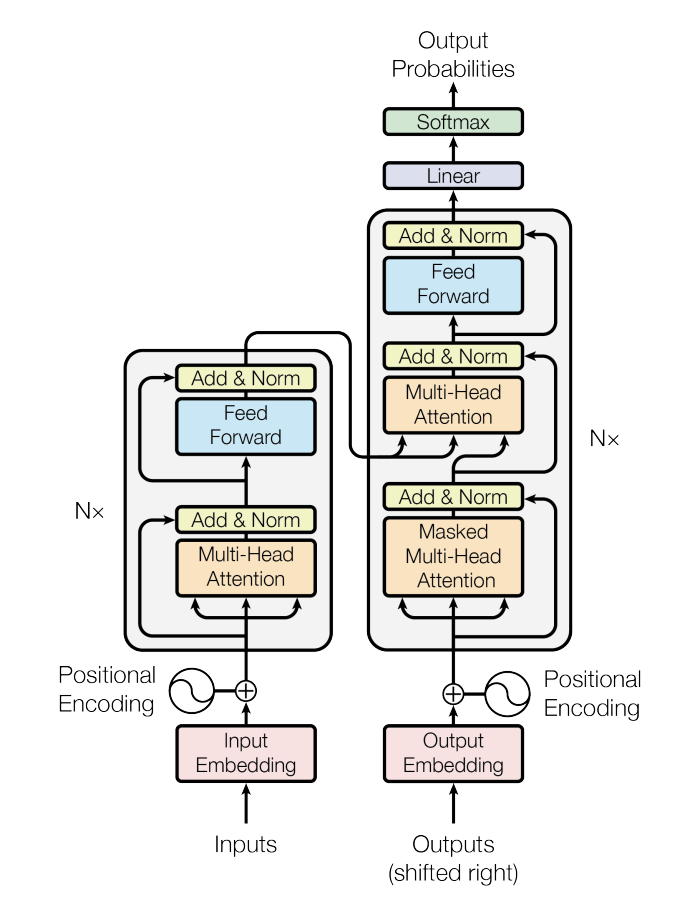
- 元文献
  - Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.
    - https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

## What is Attension?
-  Scaled Dot-Product Attention
  - $Attention(Q,K,V)=softmax(\frac{QK^T}{\sqrt{d_k}})V$
  - D_k:Number of dimensions of Q and K
- Multi-Head Attention
  - Linear neural network layer is added immediately before the feature subspace to enable learning of Attention in a wide variety of feature subspaces.
- Position-Wise Feed-Forward Networks
  - Put a non-linear neural network layer immediately after Attention.

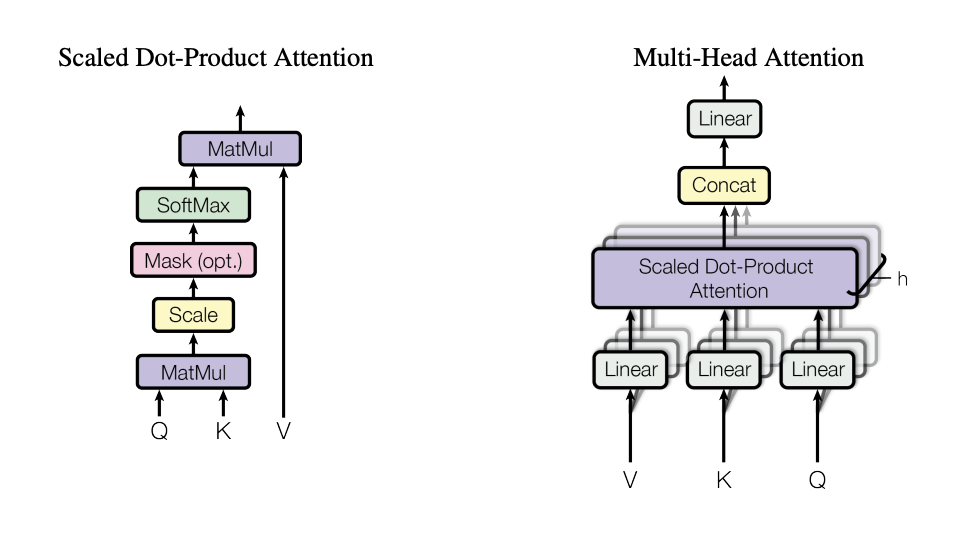



## What is a softmax function?
- $f(x)=\frac{e^{x_{k}}}{\sum_{k=1}^n e^{x_{k}}}$
  - Function that adjusts the sum to 1 (100%) when there are n data

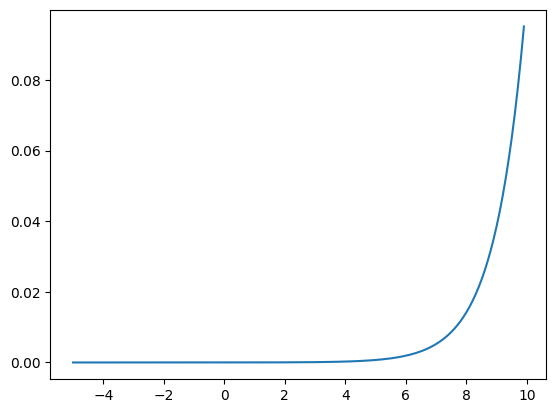

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import softmax

x = np.arange(-5, 10, 0.1)
y = softmax(x)

plt.plot(x,y)
plt.show()

In [96]:
y.sum()

1.0

## Vectorize sentences (make a fool out of Input Embedding)
- This time, we will vectorize sentences using the BERT pre-training model ''bert-base-uncased' (English) or 'cl-tohoku/bert-base-japanese-v2' (japanese).
- After splitting a sentence into words (tokenize), extract a vector for each word.

In [97]:
%%capture
!pip install transformers
!pip install sentencepiece
!pip install fugashi unidic-lite
!pip install ipadic
!pip install japanize_matplotlib

In [100]:
from transformers import BertModel, BertTokenizer
import torch

def get_bert_embeddings(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    hidden_states = outputs.last_hidden_state
    token_embeddings = hidden_states.squeeze().detach().numpy()

    return token_embeddings

text = "My favorite food is ramen."
embeddings = get_bert_embeddings(text)
print(embeddings)


[[-1.6409099e-01  1.2847460e-02 -3.3774975e-01 ... -2.2996586e-02
   3.2116175e-01  5.3049660e-01]
 [-1.7106459e-01 -3.4023684e-01 -1.7442761e-01 ... -1.3537121e-01
   4.0893385e-01  3.8064671e-01]
 [ 5.1416620e-04 -1.2608409e-01  3.5761113e-03 ... -3.8191359e-02
   2.6107613e-02  3.8390554e-02]
 ...
 [ 6.2228579e-02  1.3385142e-01 -1.0099285e-01 ... -1.6818477e-02
  -5.6786694e-02  3.2820991e-01]
 [ 5.3980898e-02 -3.1063527e-01 -2.1087965e-01 ...  3.5443813e-01
   3.1892666e-01 -3.4541050e-01]
 [ 4.9337122e-01 -1.1599028e-02 -6.2610232e-03 ...  4.8956609e-01
  -1.4092702e-01 -2.2215882e-01]]


In [117]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

text = "My favorite food is ramen."
inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

print(tokens)

['[CLS]', 'my', 'favorite', 'food', 'is', 'ram', '##en', '.', '[SEP]']


In [118]:
df_en=pd.DataFrame(data=embeddings, index=tokens)
df_en

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
[CLS],-0.164091,0.012847,-0.337750,-0.331018,-0.211361,-0.123838,0.024634,0.684797,0.242108,-0.255155,...,0.068552,-0.168423,0.381173,-0.099692,0.373899,0.004751,0.146781,-0.022997,0.321162,0.530497
my,-0.171065,-0.340237,-0.174428,-0.020455,-0.094049,0.346004,0.223441,1.539680,0.128049,-0.774864,...,0.699543,0.183880,0.267557,-0.283120,-0.027976,0.258020,0.382770,-0.135371,0.408934,0.380647
favorite,0.000514,-0.126084,0.003576,-0.065653,0.696243,0.273584,0.171841,1.159699,-0.543535,-0.517709,...,0.040043,0.010171,-0.016995,0.341832,0.304797,-0.381324,0.239097,-0.038191,0.026108,0.038391
food,0.186925,-0.012440,-0.317940,-0.271259,0.417181,-0.282802,-0.107160,1.535743,0.279496,-0.068840,...,-0.426542,-0.418241,0.282521,0.961084,0.381355,0.149578,0.939401,0.121347,0.309771,-0.054030
is,-0.285501,-0.167239,-0.009050,0.035324,0.767405,0.402801,-0.059205,1.524503,-0.152520,-0.612263,...,-0.200841,-0.868970,0.168022,-0.064417,0.236826,0.365904,0.606558,-0.146482,0.103110,0.826414
ram,0.251362,0.076127,-0.210844,-0.076428,0.482854,0.569916,0.309250,1.649965,-0.421555,0.088741,...,-0.344813,-0.598710,0.752346,-0.008501,0.074981,-0.020015,0.313057,-0.330416,0.256314,0.669570
##en,0.062229,0.133851,-0.100993,0.184277,0.347747,0.315022,-0.492380,1.111644,-0.479354,-0.448925,...,-0.228212,-0.523375,0.333664,0.182633,0.148902,0.309269,0.387442,-0.016818,-0.056787,0.328210
.,0.053981,-0.310635,-0.210880,0.022305,0.117778,-0.617060,-0.119066,0.499774,0.347252,-0.651130,...,0.273209,-0.243606,0.262795,0.039806,0.362869,-0.752383,-0.039147,0.354438,0.318927,-0.345410
[SEP],0.493371,-0.011599,-0.006261,0.345188,0.162284,-0.954742,0.065419,0.031711,0.339670,-0.184345,...,0.155732,0.191619,0.228366,-0.708711,0.309764,-0.719053,0.184578,0.489566,-0.140927,-0.222159


## Calculate Attention
- Self-Attention uses the above $8$word$\times$$768$feature matrix for both $Q, K, and V$.
- The implication is that the $softmax(\frac{QK^T}{\sqrt{d_k}})$ part ends up being an $8\times8$ matrix, meaning that the words in the sentence are weighted according to their correlation with each other-->this part is called the attention weights matrix This part is called the attention weights matrix.
- Finally, by combining the attention weights matrix and the matrix V, we can generate a vector that weights the relationships between the words in the sentence.

In [119]:
Q=df_en.values
K=df_en.values
V=df_en.values

In [120]:
from scipy.special import softmax
import numpy as np

scaled_attention_logits=np.dot(Q,K.T)/np.sqrt(K.shape[1])
attention_weights=softmax(scaled_attention_logits, axis=1)
attention_weights

array([[9.9169308e-01, 3.5206634e-03, 9.6887618e-04, 8.2002307e-04,
        7.8258110e-04, 7.7543914e-04, 8.1265281e-04, 4.5437409e-04,
        1.7227346e-04],
       [4.0541086e-03, 8.6345243e-01, 6.5534659e-02, 1.3325677e-02,
        3.2699667e-02, 8.4707793e-03, 6.4150430e-03, 4.6009617e-03,
        1.4465782e-03],
       [2.5395752e-04, 1.4917395e-02, 8.9706862e-01, 3.4795318e-02,
        2.3837693e-02, 1.8470811e-02, 9.0611251e-03, 1.0266445e-03,
        5.6834630e-04],
       [2.6799014e-04, 3.7819117e-03, 4.3383140e-02, 7.9055673e-01,
        1.2127235e-02, 9.3662679e-02, 5.4521032e-02, 1.0655470e-03,
        6.3371653e-04],
       [3.6788036e-04, 1.3349029e-02, 4.2751230e-02, 1.7443998e-02,
        9.0080696e-01, 1.3344491e-02, 8.6271530e-03, 2.1136103e-03,
        1.1957551e-03],
       [4.0328934e-05, 3.8257954e-04, 3.6649015e-03, 1.4905372e-02,
        1.4763658e-03, 9.6256512e-01, 1.6678642e-02, 1.6366289e-04,
        1.2297138e-04],
       [4.4312546e-04, 3.0377395e-03, 1.

In [121]:
attention_weights.shape

(9, 9)

In [122]:
V.shape

(9, 768)

In [123]:
np.dot(attention_weights, V)

array([[-0.16304481,  0.0113043 , -0.336165  , ..., -0.02335878,
         0.32056683,  0.5286603 ],
       [-0.15169206, -0.30756605, -0.15969074, ..., -0.12322338,
         0.3666779 ,  0.36550707],
       [ 0.00310873, -0.12030423, -0.01578795, ..., -0.04116831,
         0.0473057 ,  0.07293235],
       ...,
       [ 0.10151234,  0.10019864, -0.13748258, ..., -0.06015004,
         0.03660906,  0.35136944],
       [ 0.10063326, -0.27405924, -0.1870906 , ...,  0.36125562,
         0.26623574, -0.31900147],
       [ 0.42308605, -0.0559291 , -0.03769972, ...,  0.46237892,
        -0.06988046, -0.23233525]], dtype=float32)

In [124]:
np.dot(attention_weights, V).shape

(9, 768)

In [125]:
weights=attention_weights.copy()
np.fill_diagonal(weights, 0)
weights

array([[0.0000000e+00, 3.5206634e-03, 9.6887618e-04, 8.2002307e-04,
        7.8258110e-04, 7.7543914e-04, 8.1265281e-04, 4.5437409e-04,
        1.7227346e-04],
       [4.0541086e-03, 0.0000000e+00, 6.5534659e-02, 1.3325677e-02,
        3.2699667e-02, 8.4707793e-03, 6.4150430e-03, 4.6009617e-03,
        1.4465782e-03],
       [2.5395752e-04, 1.4917395e-02, 0.0000000e+00, 3.4795318e-02,
        2.3837693e-02, 1.8470811e-02, 9.0611251e-03, 1.0266445e-03,
        5.6834630e-04],
       [2.6799014e-04, 3.7819117e-03, 4.3383140e-02, 0.0000000e+00,
        1.2127235e-02, 9.3662679e-02, 5.4521032e-02, 1.0655470e-03,
        6.3371653e-04],
       [3.6788036e-04, 1.3349029e-02, 4.2751230e-02, 1.7443998e-02,
        0.0000000e+00, 1.3344491e-02, 8.6271530e-03, 2.1136103e-03,
        1.1957551e-03],
       [4.0328934e-05, 3.8257954e-04, 3.6649015e-03, 1.4905372e-02,
        1.4763658e-03, 0.0000000e+00, 1.6678642e-02, 1.6366289e-04,
        1.2297138e-04],
       [4.4312546e-04, 3.0377395e-03, 1.

In [126]:
import pandas as pd
df_en_fin = pd.DataFrame(data=weights, index=tokens, columns=tokens)
df_en_fin=df_en_fin.drop('[CLS]', axis=0).drop('[CLS]', axis=1).drop('[SEP]', axis=0).drop('[SEP]', axis=1)
df_en_fin

,my,favorite,food,is,ram,##en,.
my,0.000000,0.065535,0.013326,0.032700,0.008471,0.006415,0.004601
favorite,0.014917,0.000000,0.034795,0.023838,0.018471,0.009061,0.001027
food,0.003782,0.043383,0.000000,0.012127,0.093663,0.054521,0.001066
is,0.013349,0.042751,0.017444,0.000000,0.013344,0.008627,0.002114
ram,0.000383,0.003665,0.014905,0.001476,0.000000,0.016679,0.000164
##en,0.003038,0.018850,0.090969,0.010007,0.174869,0.000000,0.001647
.,0.003185,0.003122,0.002599,0.003584,0.002508,0.002407,0.000000


<Axes: >

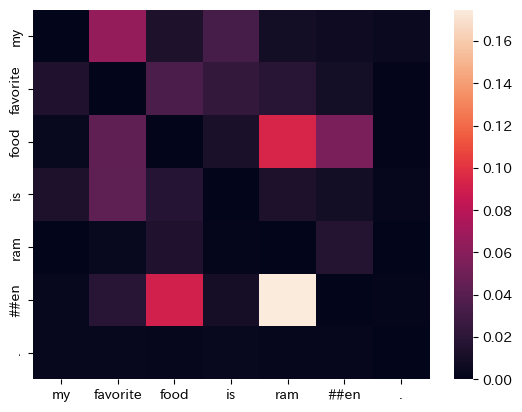

In [127]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib

sns.heatmap(df_en_fin)

- "food", "ram", and "##en" are in focus on each other.
- Indicates that "Ramen" is a "food".

## 日本語な人たちへ

In [128]:
import torch
from transformers import BertForPreTraining
from transformers import BertJapaneseTokenizer, BertModel

tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-v2')
model = BertModel.from_pretrained('cl-tohoku/bert-base-japanese-v2')

In [132]:
text='私の好きな食べ物はラーメンです。'

In [133]:
encoded_input = tokenizer.encode_plus(
    text,
    truncation=True,
    padding=False,
    return_tensors='pt'  # This line will make encoded_input tensors
)
encoded_input

{'input_ids': tensor([[    2,  3946,   896, 12215,   892, 18472,   897, 16979, 12461,   829,
             3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [134]:
input_ids=encoded_input["input_ids"]
input_ids

tensor([[    2,  3946,   896, 12215,   892, 18472,   897, 16979, 12461,   829,
             3]])

In [135]:
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
tokens = [s.replace('▁', '') for s in tokens]
print(tokens)

['[CLS]', '私', 'の', '好き', 'な', '食べ物', 'は', 'ラーメン', 'です', '。', '[SEP]']


- 下記のとおり、「私の大好きな食べ物はラーメンです。」という文章は１１個の単語に分けられ、それぞれ事前学習モデル内での単語IDが振られる
  - [CLS]：classification embeddingと呼ばれ、文章の最初に付与され、最終的にこの文章全体の意味を表すベクトルが割り当てられるため、文章分類等に用いられる
    - 無視して構わない
  - [SEP]: 文の区切りを表すトークン

In [136]:
import pandas as pd
df = pd.DataFrame(data=np.array(input_ids),columns=tokens)
df

,[CLS],私,の,好き,な,食べ物,は,ラーメン,です,。,[SEP]
0,2,3946,896,12215,892,18472,897,16979,12461,829,3


- モデルを使ってベクトル化
  - last_hidden_stateがその文章、単語の内部的な意味を表すベクトル群(行列)
      - 今回の場合は11× 786行列-->各単語を786次元ベクトルで表現
  - pooler_outputはCLSと呼ばれる文章の平均値のようなもの(今回は使わない)
    - 今回の場合は1 × 786 -->文章全体を786次元ベクトルで表現

In [137]:
outputs = model(**encoded_input)
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-8.5466e-02, -1.8786e-02,  1.7209e-01,  ..., -1.4381e-02,
           4.6963e-01, -5.4065e-01],
         [-7.7133e-03,  1.5068e-01, -1.0408e+00,  ..., -5.3967e-01,
           4.7720e-01, -4.7821e-01],
         [-6.6494e-01,  4.2275e-02, -4.4073e-01,  ...,  4.2882e-01,
          -1.3535e+00, -4.4908e-01],
         ...,
         [-3.9062e-01,  7.5694e-01,  7.4132e-01,  ..., -6.2185e-01,
          -1.3400e+00, -5.5589e-01],
         [-6.5197e-01, -1.0149e+00, -5.9966e-01,  ..., -5.2631e-01,
           5.3222e-02, -1.0889e+00],
         [-1.8182e-01, -8.6348e+00, -1.1254e-01,  ..., -2.0495e-01,
          -2.1119e-01, -6.2345e-01]]], grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 1.6003e-01,  2.6211e-01, -7.9795e-01,  9.8334e-02, -1.0151e-01,
         -1.4366e-01, -2.0592e-01, -2.6211e-01, -8.2914e-01,  4.5956e-01,
         -1.4295e-01, -2.1072e-01,  8.9508e-02,  3.3386e-01,  2.0658e-02,
          2.1269e-

In [138]:
outputs.last_hidden_state.shape

torch.Size([1, 11, 768])

- 各単語が768個の値で表されている

In [139]:
df2=pd.DataFrame(data=torch.squeeze(outputs.last_hidden_state, 0).detach().numpy() , index=tokens)
df2

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
[CLS],-0.085466,-0.018786,0.172087,-0.673424,-0.395927,0.303220,-0.263556,0.513844,0.275382,0.153477,...,0.151002,-0.309439,-0.909573,-0.504613,-0.200639,-0.606353,-0.419760,-0.014381,0.469633,-0.540649
私,-0.007713,0.150679,-1.040779,-0.414258,-0.386825,0.161234,-0.401697,0.528729,-0.951447,0.571028,...,0.446374,-1.583697,-1.406752,-0.891336,-0.804187,-0.122206,-0.100170,-0.539672,0.477199,-0.478214
の,-0.664944,0.042275,-0.440732,0.881236,-0.092266,-0.351243,-0.059452,0.456213,0.031845,-0.819408,...,-0.245372,-1.843885,-0.889406,-0.678101,0.147056,0.424517,0.452287,0.428823,-1.353514,-0.449076
好き,-0.134871,-0.007706,-0.076810,0.638621,-0.271014,-0.713676,-0.213217,-0.012122,-0.183412,-0.271795,...,0.163432,-0.510562,-0.064526,-0.384855,-0.551474,0.230237,-0.129397,-0.180447,-0.839425,-0.869006
な,-0.583909,0.767519,0.290355,0.716412,-0.967197,0.191436,-0.121540,1.514752,0.542840,-0.215971,...,0.640336,-0.492122,-0.420993,-0.188785,-0.278850,-0.206080,0.513856,0.037751,-1.109335,-0.186079
食べ物,0.109156,0.590682,-0.891284,0.429657,0.414310,-0.671767,-0.376964,1.303487,0.541368,0.362836,...,2.008016,-0.671179,-0.811601,0.132692,-0.057409,-0.656557,-1.189474,0.360883,-0.032135,-0.665048
は,-0.270488,0.840842,-1.117322,0.103498,-0.018758,0.020856,-0.072668,1.496136,1.648185,-0.020288,...,0.395707,0.377123,-0.256160,-0.611658,0.792703,-0.803721,0.331660,1.053557,-0.827289,-0.737491
ラーメン,-0.168196,0.362538,0.209606,-0.739488,-0.113530,0.523720,-0.201245,0.778396,1.193648,0.536421,...,0.734563,-0.566880,-1.348761,-0.460896,-0.229857,0.034187,-0.706070,-0.842961,-0.278159,-0.006700
です,-0.390621,0.756940,0.741318,-0.707893,-1.745430,0.071439,-0.330797,1.439762,1.602520,0.437558,...,-0.943683,-0.898429,-1.878390,-0.453514,-0.522349,-0.119714,-1.042984,-0.621847,-1.339981,-0.555892
。,-0.651968,-1.014914,-0.599665,-1.270387,-0.024750,0.191244,-0.426639,0.685916,0.735104,-0.920754,...,-0.480013,-0.303417,-1.954354,-0.138604,0.225004,-0.438424,0.633349,-0.526305,0.053222,-1.088910


## Attentionを計算
- Self-Attentionは、$Q、K、V$を共に上記の$11$単語$\times$$768$特徴の行列を用いる
- そのときの意味合いは$softmax(\frac{QK^T}{\sqrt{d_k}})$の部分は、結局$11\times11$行列となり、文章中の単語同士で相関があるものを重みづけしていることを意味する-->この部分をattention weights行列と呼ぶこととする
- 最後にattention weights行列と行列Vを変え合わせることにより、文章中の単語の関係性を重みづけたベクトルを生み出すことができる

In [140]:
Q=df2.values
K=df2.values
V=df2.values

In [141]:
from scipy.special import softmax
import numpy as np

scaled_attention_logits=np.dot(Q,K.T)/np.sqrt(K.shape[1])
attention_weights=softmax(scaled_attention_logits, axis=1)
attention_weights

array([[9.63488758e-01, 1.47394584e-02, 3.40000668e-04, 4.59998526e-04,
        1.73282140e-04, 5.54785831e-04, 5.19297842e-04, 3.93542461e-03,
        4.27670078e-03, 1.12140914e-02, 2.98317929e-04],
       [8.91213247e-04, 9.98094976e-01, 1.31113804e-04, 3.18834645e-04,
        2.06117256e-05, 6.24174936e-05, 1.30936160e-05, 7.58237438e-05,
        2.31647427e-04, 1.33837690e-04, 2.63777620e-05],
       [6.22290827e-07, 3.96882342e-06, 9.99953747e-01, 5.77345872e-06,
        1.31636807e-05, 5.09667075e-07, 1.24607923e-05, 8.17635950e-08,
        1.24981455e-06, 7.11063149e-06, 1.31702404e-06],
       [8.63525543e-07, 9.89883574e-06, 5.92162996e-06, 9.99756634e-01,
        1.89085898e-04, 2.41745493e-05, 8.02716932e-06, 4.15820750e-07,
        8.51956656e-07, 3.23498784e-06, 9.83744371e-07],
       [3.72076357e-07, 7.31968726e-07, 1.54433674e-05, 2.16281158e-04,
        9.99576747e-01, 1.52102211e-05, 1.67115737e-04, 2.95182474e-07,
        1.16824901e-06, 4.89338754e-06, 1.65710878e-

In [142]:
attention_weights.shape

(11, 11)

In [143]:
V.shape

(11, 768)

In [144]:
np.dot(attention_weights, V)

array([[-9.2626184e-02, -2.4264723e-02,  1.4649096e-01, ...,
        -3.2933388e-02,  4.5174190e-01, -5.4409564e-01],
       [-8.1089912e-03,  1.5028085e-01, -1.0386848e+00, ...,
        -5.3890461e-01,  4.7589812e-01, -4.7846705e-01],
       [-6.6493082e-01,  4.2276405e-02, -4.4072977e-01, ...,
         4.2880860e-01, -1.3534802e+00, -4.4908398e-01],
       ...,
       [-3.9061332e-01,  7.5684720e-01,  7.4124426e-01, ...,
        -6.2182903e-01, -1.3398914e+00, -5.5588925e-01],
       [-6.5193790e-01, -1.0150044e+00, -5.9962410e-01, ...,
        -5.2627182e-01,  5.3187378e-02, -1.0888717e+00],
       [-1.8202849e-01, -8.6303778e+00, -1.1271172e-01, ...,
        -2.0505598e-01, -2.1119832e-01, -6.2360960e-01]], dtype=float32)

In [145]:
np.dot(attention_weights, V).shape

(11, 768)

In [146]:
weights=attention_weights.copy()
np.fill_diagonal(weights, 0)
weights

array([[0.00000000e+00, 1.47394584e-02, 3.40000668e-04, 4.59998526e-04,
        1.73282140e-04, 5.54785831e-04, 5.19297842e-04, 3.93542461e-03,
        4.27670078e-03, 1.12140914e-02, 2.98317929e-04],
       [8.91213247e-04, 0.00000000e+00, 1.31113804e-04, 3.18834645e-04,
        2.06117256e-05, 6.24174936e-05, 1.30936160e-05, 7.58237438e-05,
        2.31647427e-04, 1.33837690e-04, 2.63777620e-05],
       [6.22290827e-07, 3.96882342e-06, 0.00000000e+00, 5.77345872e-06,
        1.31636807e-05, 5.09667075e-07, 1.24607923e-05, 8.17635950e-08,
        1.24981455e-06, 7.11063149e-06, 1.31702404e-06],
       [8.63525543e-07, 9.89883574e-06, 5.92162996e-06, 0.00000000e+00,
        1.89085898e-04, 2.41745493e-05, 8.02716932e-06, 4.15820750e-07,
        8.51956656e-07, 3.23498784e-06, 9.83744371e-07],
       [3.72076357e-07, 7.31968726e-07, 1.54433674e-05, 2.16281158e-04,
        0.00000000e+00, 1.52102211e-05, 1.67115737e-04, 2.95182474e-07,
        1.16824901e-06, 4.89338754e-06, 1.65710878e-

In [147]:
import pandas as pd
df3 = pd.DataFrame(data=weights, index=tokens, columns=tokens)
df3=df3.drop('[CLS]', axis=0).drop('[CLS]', axis=1).drop('[SEP]', axis=0).drop('[SEP]', axis=1)
df3

,私,の,好き,な,食べ物,は,ラーメン,です,。
私,0.000000e+00,0.000131,3.188346e-04,0.000021,6.241749e-05,0.000013,7.582374e-05,2.316474e-04,0.000134
の,3.968823e-06,0.000000,5.773459e-06,0.000013,5.096671e-07,0.000012,8.176360e-08,1.249815e-06,0.000007
好き,9.898836e-06,0.000006,0.000000e+00,0.000189,2.417455e-05,0.000008,4.158208e-07,8.519567e-07,0.000003
な,7.319687e-07,0.000015,2.162812e-04,0.000000,1.521022e-05,0.000167,2.951825e-07,1.168249e-06,0.000005
食べ物,1.207708e-05,0.000003,1.506592e-04,0.000083,0.000000e+00,0.000182,1.081900e-04,5.752072e-06,0.000005
は,3.468828e-07,0.000011,6.849627e-06,0.000125,2.486883e-05,0.000000,1.021957e-06,4.082415e-06,0.000007
ラーメン,1.432904e-04,0.000005,2.531046e-05,0.000016,1.056681e-03,0.000073,0.000000e+00,1.173670e-03,0.000036
です,8.225685e-06,0.000001,9.744140e-07,0.000001,1.055634e-06,0.000005,2.205354e-05,0.000000e+00,0.000017
。,3.326823e-06,0.000006,2.590033e-06,0.000003,6.627066e-07,0.000007,4.695254e-07,1.223398e-05,0.000000


<Axes: >

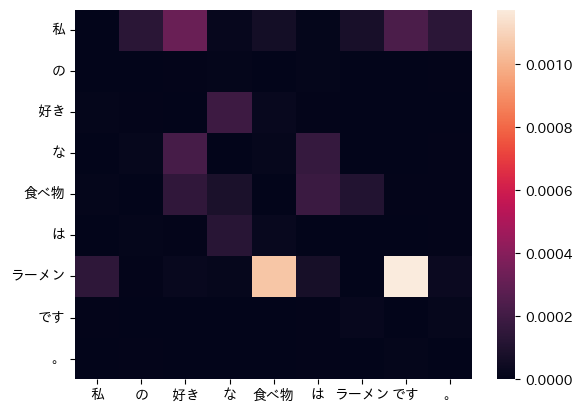

In [148]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib

sns.heatmap(df3)

- 「ラーメン」と「食べ物」、「ラーメン」と「です」、「大好き」と「食べ物」に注意が向いている

## 結局、Attentionとは何をやっているのか？
### 行列同士の積
- $\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1m} \\
a_{21} & a_{22} & \cdots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
a_{l1} & a_{l2} & \cdots & a_{lm} \\
\end{bmatrix}
\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1n} \\
b_{21} & b_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
b_{m1} & b_{m2} & \cdots & b_{mn} \\
\end{bmatrix}=
\begin{bmatrix}
c_{11} & c_{12} & \cdots & c_{1n} \\
c_{21} & c_{22} & \cdots & c_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
c_{l1} & c_{l2} & \cdots & c_{ln} \\
\end{bmatrix}, c_{ij}=\sum_{k=1}^n a_{ik}b_{kj}
$
- つまり、内積を計算しているのと一緒
  - 行ベクトル$\boldsymbol{a}_i=\begin{bmatrix}
a_{i1} & a_{i2} & \cdots & a_{in} \\
\end{bmatrix}$と列ベクトル$\boldsymbol{b}_i=\begin{bmatrix}
b_{1j}  \\
b_{2j}  \\
\vdots  \\
b_{nj}  \\
\end{bmatrix}$の内積$\boldsymbol{a}_i\boldsymbol{b}_j=a_{i1}b_{1j}+a_{i2}b_{2j}+\cdots+a_{in}b_{1n}$
- 内積は二つのベクトルの相関を示すと考えてよい
### 結局
- $QK^T$では、例えば文章の場合は文章を単語に区切った場合、文章中の単語同士がどのように相関するのかを導出しているかに過ぎない
  - $\frac{1}{\sqrt{d_k}}$や$softmax$はその正規化に過ぎない
- 上記で求めた相関と$V$を掛け合わせることにより、上記の相関を考慮したベクトルを生み出している